**Descripción**

# **Proyecto 2-Parte I (Core)**

## **Proyecto 2: Análisis Inicial y Selección de Problema**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.


**1. Búsqueda de Conjuntos de Datos:**

Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

**About Dataset**
 Covid-19: https://www.kaggle.com/datasets/fireballbyedimyrnmom/us-counties-covid-19-dataset

In [1]:
# Importamos las libretias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '../Datasets/dataset4.csv'
df = pd.read_csv(path)

## **1. Análisis Estadístico Descriptivo:**

* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.

* Analizar la distribución de las variables categóricas.

In [2]:
# Exploramos los datos
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


* Identificación de Valores Nulos y Outliers:

* Detectar valores nulos y discutir cómo podrían ser tratados.

* Identificar outliers y evaluar su impacto potencial en el análisis


In [3]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
deaths,2445227,57605,2.30
fips,2479154,23678,0.95
county,2502832,0,0.00
date,2502832,0,0.00
state,2502832,0,0.00
cases,2502832,0,0.00


In [ ]:
# Mamejamos los datos faltantes
df['fips'] = df['fips'].fillna(0)  # Completamos los datos faltantes con 0
df['deaths'] = df['deaths'].fillna(0) # Completamos los datos faltantes con 0

In [8]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
date,2502832,0,0.0
county,2502832,0,0.0
state,2502832,0,0.0
fips,2502832,0,0.0
cases,2502832,0,0.0
deaths,2502832,0,0.0


In [4]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [5]:
# Estatísticas descriptivas
df.describe()

,fips,cases,deaths
count,2.479154e+06,2.502832e+06,2.445227e+06
mean,3.139958e+04,1.003380e+04,1.616100e+02
std,1.634251e+04,4.752522e+04,8.203335e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.902300e+04,3.820000e+02,6.000000e+00
50%,3.001100e+04,1.773000e+03,3.300000e+01
75%,4.611100e+04,5.884000e+03,1.010000e+02
max,7.803000e+04,2.908425e+06,4.026700e+04


In [10]:
# Verificamos los tipos de datos
df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [12]:
# Convertimos los tipos
df['date'] = pd.to_datetime(df['date'])  
df['county'] = df['county'].astype(str)  
df['state'] = df['state'].astype(str)    
df['fips'] = df['fips'].astype(int).astype(str) 
df['cases'] = df['cases'].astype(int)    
df['deaths'] = df['deaths'].astype(int)  

**3. Visualizaciones:**

* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).

* Visualizar las correlaciones entre variables (mapa de calor de correlación).

Resumen de Hallazgos:
Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.

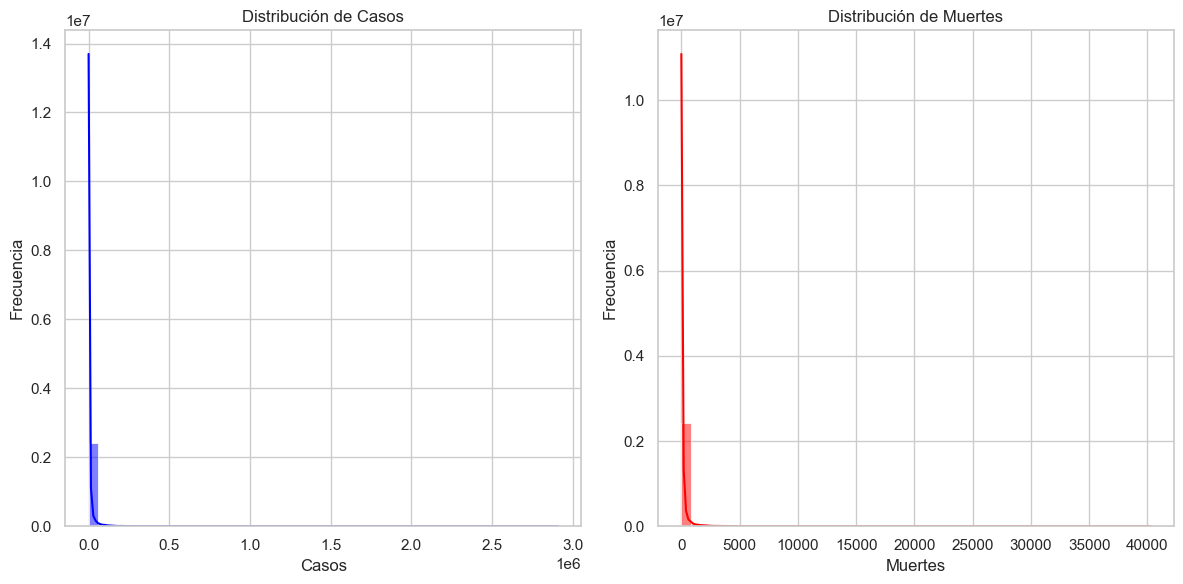

In [ ]:
# Creamos el grafico
sns.set(style="whitegrid")

# Distribuciones de casos y muertes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['cases'], bins=50, kde=True, color='blue')
plt.title('Distribución de Casos')
plt.xlabel('Casos')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df['deaths'], bins=50, kde=True, color='red')
plt.title('Distribución de Muertes')
plt.xlabel('Muertes')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


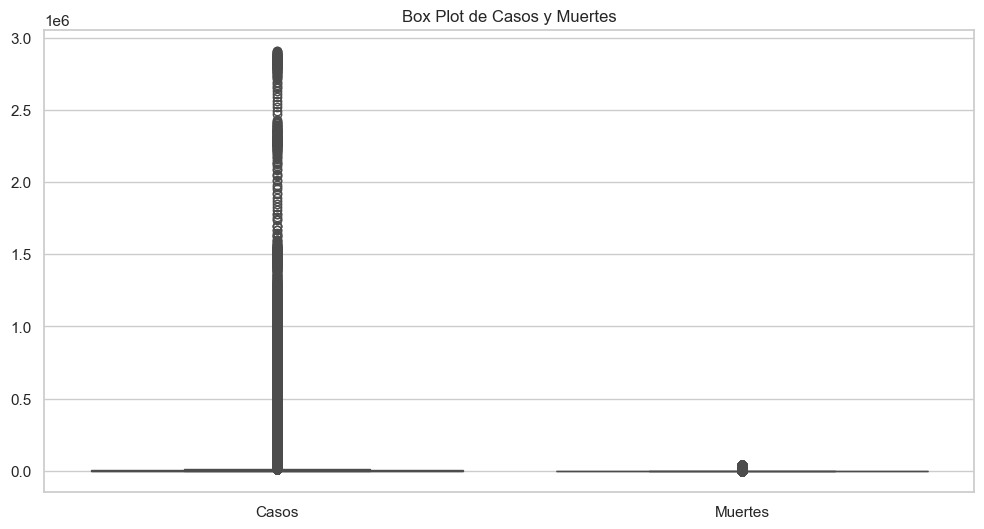

C:\Users\damav\AppData\Local\Temp\ipykernel_36408\3578551266.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.values, y=top_counties.index, palette="viridis")


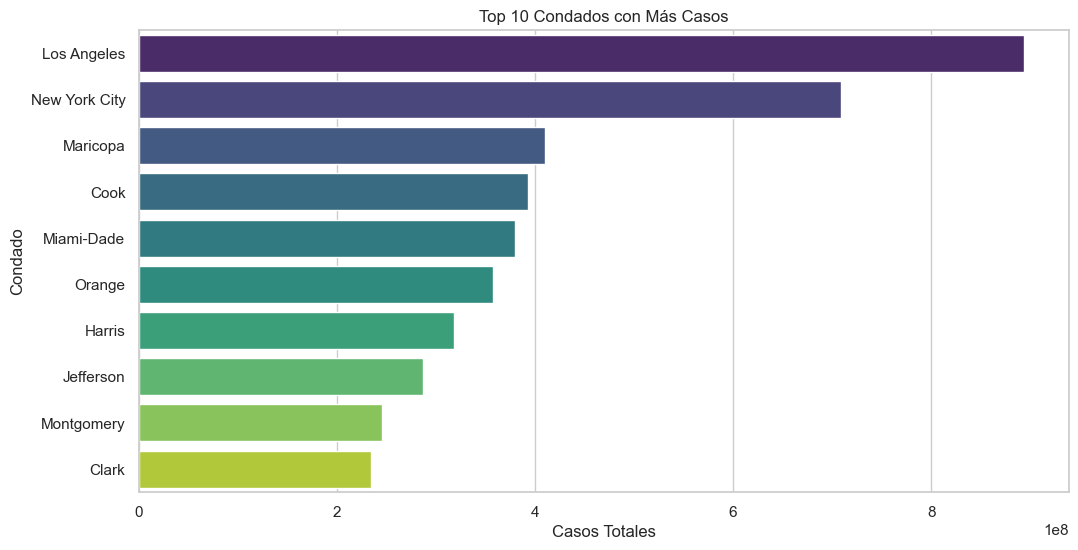

In [15]:
# Box plot de casos y muertes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['cases', 'deaths']])
plt.title('Box Plot de Casos y Muertes')
plt.xticks(ticks=[0, 1], labels=['Casos', 'Muertes'])
plt.show()

# Top 10 con más casos
top_counties = df.groupby('county')['cases'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_counties.values, y=top_counties.index, palette="viridis")
plt.title('Top 10 Condados con Más Casos')
plt.xlabel('Casos Totales')
plt.ylabel('Condado')
plt.show()